In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
liverT = pd.read_excel('./dot_under_0.2/NFRP_liver_target.xlsx')
liverT.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00135.00135.3,1,LRSDLDEKETER/3,0.185,0.000638,[2],0,0.324,68,0.0634,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q69YQ0|CYTSA_HUMAN(pre=K,post=S)",163016217
1,Adult_Liver_bRP_Elite_82_f01.00146.00146.2,1,ELISVVIAVK/2,0.178,0.010000,[2],0,-0.005,31,0.0730,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q86VP3|PACS2_HUMAN(pre=K,post=M)",54458459
2,Adult_Liver_bRP_Elite_82_f01.00337.00337.2,1,IVGGWDLLPR/2,0.190,0.011000,[2],0,0.506,52,0.0530,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q96RQ9|OXLA_HUMAN(pre=R,post=A)",119810442
3,Adult_Liver_bRP_Elite_82_f01.00374.00374.2,1,RGDGSVPEYDPSSDR/2,0.180,0.010000,[2],0,-0.004,17,0.0610,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q96QZ7|MAGI1_HUMAN(pre=K,post=H)",211849982
4,Adult_Liver_bRP_Elite_82_f01.00390.00390.2,1,LPPLPVVEKPK/2,0.163,0.015000,[2],0,-0.007,8,0.1040,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9NUL3|STAU2_HUMAN(pre=K,post=L)",159237886


In [3]:
# sequence length
print(len(liverT))

seq1 = [] # 0~10
seq2 = [] # 11~20
seq3 = [] # 21~

for i in range(len(liverT)):
    if not i % 10000:
        print(i)
    ID = liverT.loc[i, 'ID']
    seq = ID[:-2]
    
    if len(seq) >= 0 and len(seq) <=10:
        d = liverT.loc[i, 'Dot']
        seq1.append(d)
    
    elif len(seq) >= 11 and len(seq) <= 20:
        d = liverT.loc[i, 'Dot']
        seq2.append(d)
    
    elif len(seq) >= 21:
        d = liverT.loc[i, 'Dot']
        seq3.append(d)

32379
0
10000
20000
30000


In [4]:
# charge state
print(len(liverT))

cs1 = [] # 2
cs2 = [] # 3
cs3 = [] # 4~

for i in range(len(liverT)):
    if not i % 10000:
        print(i)
    ID = liverT.loc[i, 'ID']
    charge = int(ID[-1])
    
    if charge == 2:
        c = liverT.loc[i, 'Dot']
        cs1.append(c)
    
    elif charge == 3:
        c = liverT.loc[i, 'Dot']
        cs2.append(c)
    
    elif charge >= 4:
        c = liverT.loc[i, 'Dot']
        cs3.append(c)

32379
0
10000
20000
30000


In [5]:
# C-term
print(len(liverT))

ct1 = [] # 2
ct2 = [] # 3
ct3 = [] # 4~

for i in range(len(liverT)):
    if not i % 10000:
        print(i)
    ID = liverT.loc[i, 'ID']
    seq = ID[:-2]
    cterm = seq[-1]
    
    if cterm == 'R':
        ct = liverT.loc[i, 'Dot']
        ct1.append(ct)
    
    elif cterm == 'K':
        ct = liverT.loc[i, 'Dot']
        ct2.append(ct)
    
    else:
        ct = liverT.loc[i, 'Dot']
        ct3.append(ct)

32379
0
10000
20000
30000


In [6]:
liverD = pd.read_excel('./dot_under_0.2/NFRP_liver_decoy.xlsx')
liverD.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00156.00156.2,1,TGGSTVLVVRK/2,0.138,0.010,[2],0,0.000,47,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9HAB8|PPCS_HUMAN(pre=R,post=V)",634685361
1,Adult_Liver_bRP_Elite_82_f01.00171.00171.2,1,EFVSEQAQALMMK/2,0.185,0.002,[2],0,-0.005,53,0.054,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IUC4|RHPN2_HUMAN(pre=K,post=I)",566374719
2,Adult_Liver_bRP_Elite_82_f01.00177.00177.2,1,FVTSFVVTVK/2,0.178,0.028,[2],0,0.001,55,0.064,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O15144|ARPC2_HUMAN(pre=R,post=D)",727815122
3,Adult_Liver_bRP_Elite_82_f01.00178.00178.3,1,SNASEYMDGEVKR/3,0.112,0.004,[2],0,-0.003,15,0.058,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q92793|CBP_HUMAN(pre=K,post=D)",510211019
4,Adult_Liver_bRP_Elite_82_f01.00311.00311.2,1,EASVVLILVK/2,0.155,0.025,[2],0,-0.005,31,0.061,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P53602|MVD1_HUMAN(pre=R,post=K)",714688891


In [7]:
# sequence length
print(len(liverD))

seq4 = [] # 0~10
seq5 = [] # 11~20
seq6 = [] # 21~

for i in range(len(liverD)):
    if not i % 10000:
        print(i)
    ID = liverD.loc[i, 'ID']
    seq = ID[:-2]
    
    if len(seq) >= 0 and len(seq) <=10:
        d = liverD.loc[i, 'Dot']
        seq4.append(d)
    
    elif len(seq) >= 11 and len(seq) <= 20:
        d = liverD.loc[i, 'Dot']
        seq5.append(d)
    
    elif len(seq) >= 21:
        d = liverD.loc[i, 'Dot']
        seq6.append(d)

48865
0
10000
20000
30000
40000


In [8]:
# charge state
print(len(liverD))

cs4 = [] # 2
cs5 = [] # 3
cs6 = [] # 4~

for i in range(len(liverD)):
    if not i % 10000:
        print(i)
    ID = liverD.loc[i, 'ID']
    charge = int(ID[-1])
    
    if charge == 2:
        c = liverD.loc[i, 'Dot']
        cs4.append(c)
    
    elif charge == 3:
        c = liverD.loc[i, 'Dot']
        cs5.append(c)
    
    elif charge >= 4:
        c = liverD.loc[i, 'Dot']
        cs6.append(c)

48865
0
10000
20000
30000
40000


In [9]:
# C-term
print(len(liverD))

ct4 = [] # 2
ct5 = [] # 3
ct6 = [] # 4~

for i in range(len(liverD)):
    if not i % 10000:
        print(i)
    ID = liverD.loc[i, 'ID']
    seq = ID[:-2]
    cterm = seq[-1]
    
    if cterm == 'R':
        ct = liverD.loc[i, 'Dot']
        ct4.append(ct)
    
    elif cterm == 'K':
        ct = liverD.loc[i, 'Dot']
        ct5.append(ct)
    
    else:
        ct = liverD.loc[i, 'Dot']
        ct6.append(ct)

48865
0
10000
20000
30000
40000


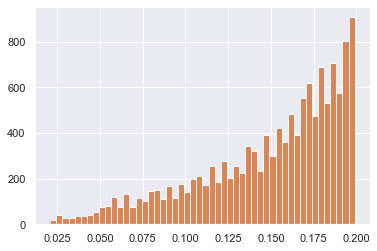

In [10]:
seqT1 = plt.hist(seq1, bins = 50)
seqD1 = plt.hist(seq4, bins = 50)

0.0035400000000000015
0.0035600000000000007


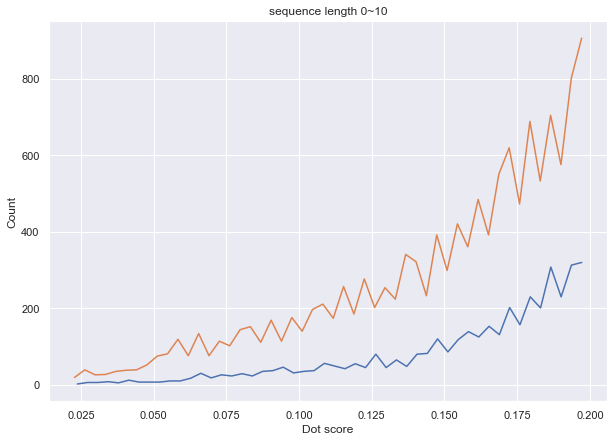

In [11]:
print(seqT1[1][1] - seqT1[1][0])
print(seqD1[1][1] - seqD1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('sequence length 0~10')
plt.plot(seqT1[1][:-1] + 0.00175, seqT1[0])
plt.plot(seqD1[1][:-1] + 0.00175, seqD1[0])
plt.show()

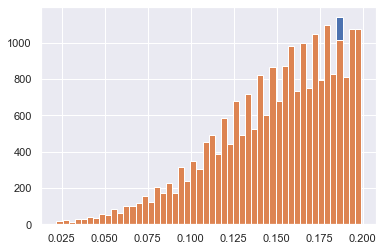

In [12]:
seqT2 = plt.hist(seq2, bins = 50)
seqD2 = plt.hist(seq5, bins = 50)

0.0035400000000000015
0.0035400000000000015


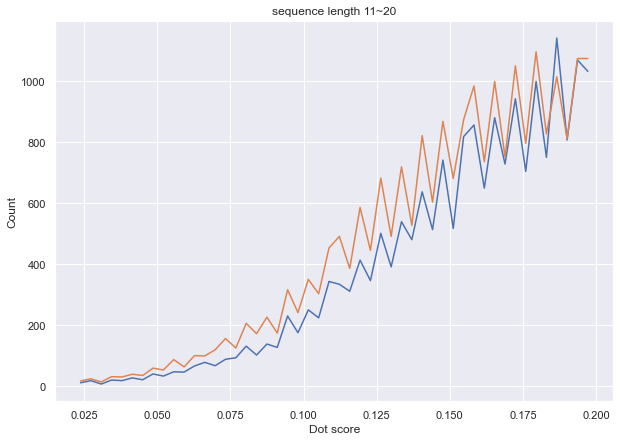

In [13]:
print(seqT2[1][1] - seqT2[1][0])
print(seqD2[1][1] - seqD2[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('sequence length 11~20')
plt.plot(seqT2[1][:-1] + 0.00175, seqT2[0])
plt.plot(seqD2[1][:-1] + 0.00175, seqD2[0])
plt.show()

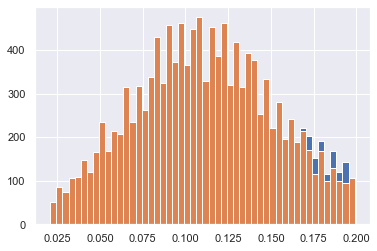

In [14]:
seqT3 = plt.hist(seq3, bins = 50)
seqD3 = plt.hist(seq6, bins = 50)

0.0035600000000000007
0.0035600000000000007


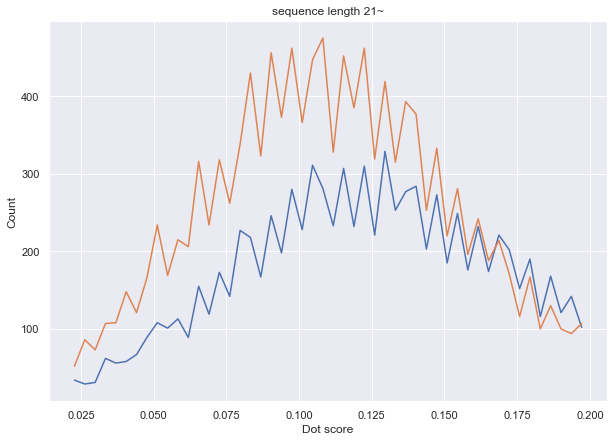

In [15]:
print(seqT3[1][1] - seqT3[1][0])
print(seqD3[1][1] - seqD3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('sequence length 21~')
plt.plot(seqT3[1][:-1] + 0.00175, seqT3[0])
plt.plot(seqD3[1][:-1] + 0.00175, seqD3[0])
plt.show()

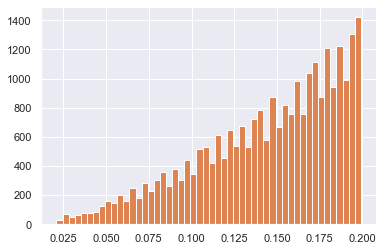

In [16]:
csT1 = plt.hist(cs1, bins = 50)
csD1 = plt.hist(cs4, bins = 50)

0.0035400000000000015
0.0035600000000000007


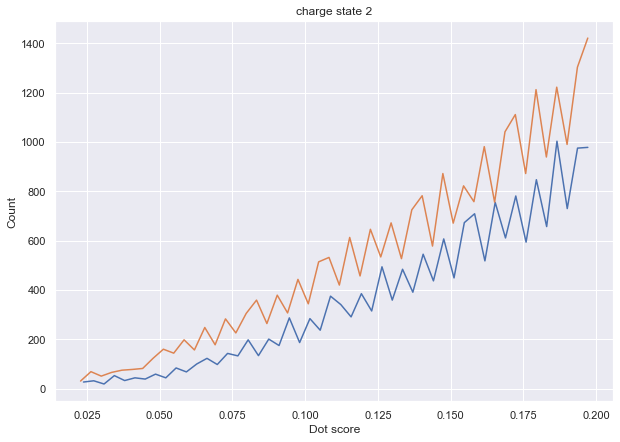

In [17]:
print(csT1[1][1] - csT1[1][0])
print(csD1[1][1] - csD1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('charge state 2')
plt.plot(csT1[1][:-1] + 0.00175, csT1[0])
plt.plot(csD1[1][:-1] + 0.00175, csD1[0])
plt.show()

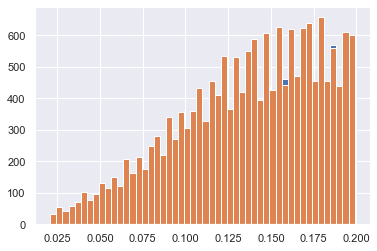

In [18]:
csT2 = plt.hist(cs2, bins = 50)
csD2 = plt.hist(cs5, bins = 50)

0.0035400000000000015
0.0035600000000000007


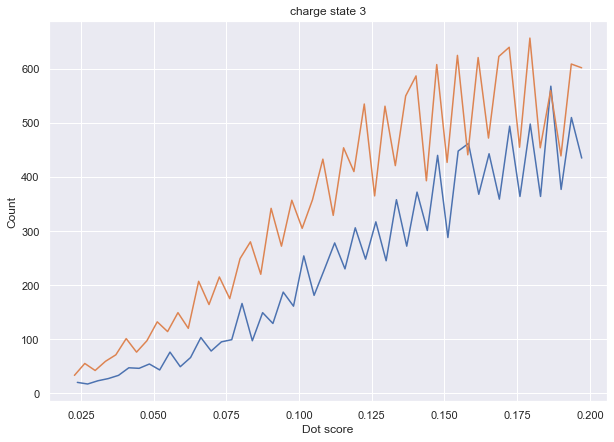

In [19]:
print(csT2[1][1] - csT2[1][0])
print(csD2[1][1] - csD2[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('charge state 3')
plt.plot(csT2[1][:-1] + 0.00175, csT2[0])
plt.plot(csD2[1][:-1] + 0.00175, csD2[0])
plt.show()

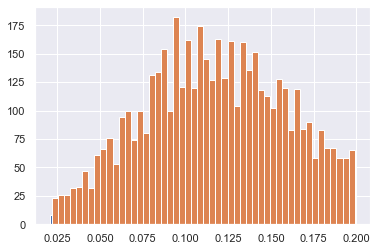

In [20]:
csT3 = plt.hist(cs3, bins = 50)
csD3 = plt.hist(cs6, bins = 50)

0.0035600000000000007
0.0035400000000000015


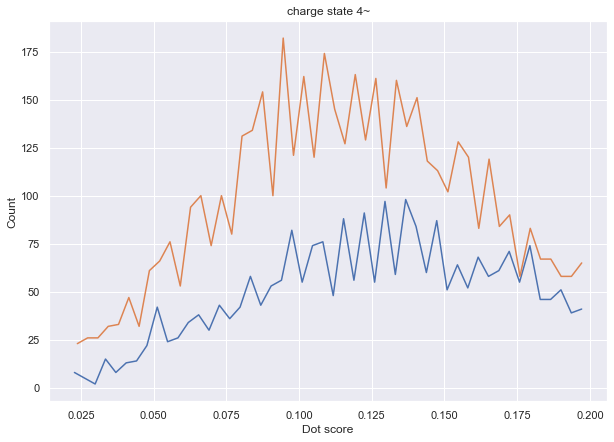

In [21]:
print(csT3[1][1] - csT3[1][0])
print(csD3[1][1] - csD3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('charge state 4~')
plt.plot(csT3[1][:-1] + 0.00175, csT3[0])
plt.plot(csD3[1][:-1] + 0.00175, csD3[0])
plt.show()

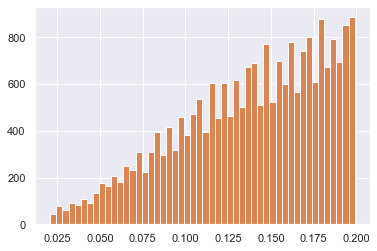

In [22]:
ctT1 = plt.hist(ct1, bins = 50)
ctD1 = plt.hist(ct4, bins = 50)

0.0035400000000000015
0.0035600000000000007


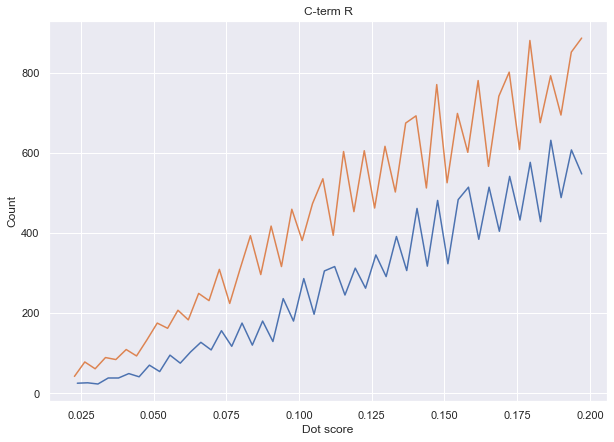

In [23]:
print(ctT1[1][1] - ctT1[1][0])
print(ctD1[1][1] - ctD1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('C-term R')
plt.plot(ctT1[1][:-1] + 0.00175, ctT1[0])
plt.plot(ctD1[1][:-1] + 0.00175, ctD1[0])
plt.show()

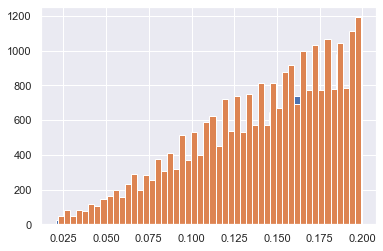

In [24]:
ctT2 = plt.hist(ct2, bins = 50)
ctD2 = plt.hist(ct5, bins = 50)

0.0035600000000000007
0.0035400000000000015


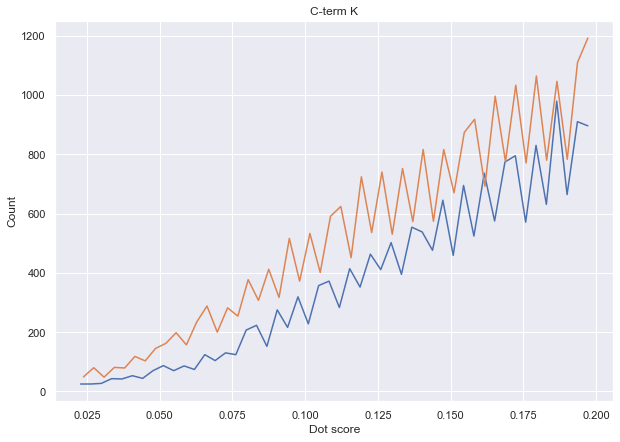

In [25]:
print(ctT2[1][1] - ctT2[1][0])
print(ctD2[1][1] - ctD2[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('C-term K')
plt.plot(ctT2[1][:-1] + 0.00175, ctT2[0])
plt.plot(ctD2[1][:-1] + 0.00175, ctD2[0])
plt.show()

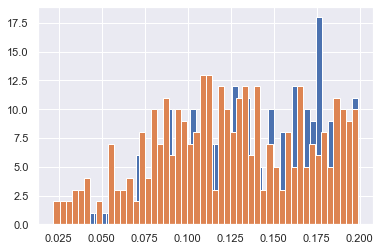

In [26]:
ctT3 = plt.hist(ct3, bins = 50)
ctD3 = plt.hist(ct6, bins = 50)

0.0034800000000000005
0.0035400000000000015


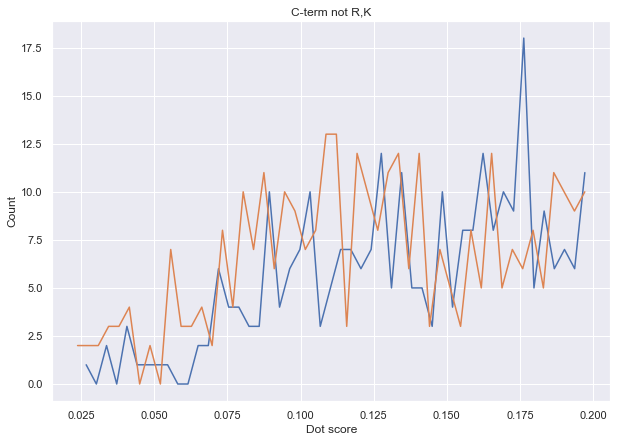

In [31]:
print(ctT3[1][1] - ctT3[1][0])
print(ctD3[1][1] - ctD3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('C-term not R,K')
plt.plot(ctT3[1][:-1] + 0.00170, ctT3[0])
plt.plot(ctD3[1][:-1] + 0.00175, ctD3[0])
plt.show()

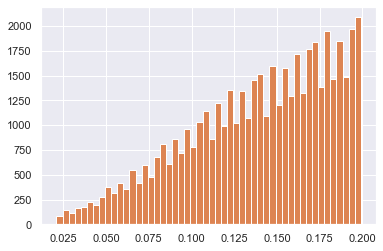

In [29]:
t = plt.hist(liverT['Dot'], bins = 50)
d = plt.hist(liverD['Dot'], bins = 50)

0.0035600000000000007
0.0035600000000000007


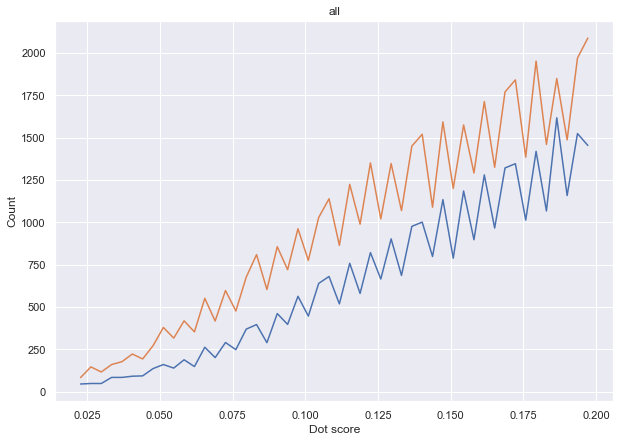

In [30]:
print(t[1][1] - t[1][0])
print(d[1][1] - d[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('all')
plt.plot(t[1][:-1] + 0.00175, t[0])
plt.plot(d[1][:-1] + 0.00175, d[0])
plt.show()